load 30m poloniex data

In [1]:
cd ..

/media/oldhome/wassname/Documents/projects/rl-portfolio-gh/rl-portfolio-management


In [2]:
# plotting
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (11.5,6)
plt.style.use('ggplot')

# numeric
import numpy as np
from numpy import random
import pandas as pd

import glob

from tqdm import tqdm_notebook as tqdm

import os, json

In [3]:
dfs=[]
for infile in glob.glob('./data/poloniex_teachmehowtotrade/*.csv'):
    df = pd.read_csv(infile)
    
    # date
    df.index=pd.to_datetime(df.date*1e9)
    del df['date']
    # just the cols from jiang 2017
    df = df[['close','high','low','open']]
    df=df.resample('30T').first()
    
    # name cols
    name = os.path.splitext(os.path.basename(infile))[0]
#     df.columns = ['%s|%s'%(name,col) for col in df.columns]
    df.name=name
    
    dfs.append(df)

In [4]:
# sort by time lengths
dfs.sort(key=lambda x:len(x), reverse=True)

In [5]:
# insert a fake one, the price of one bitcoin in bitcoin = 1
df=dfs[0].copy()
df[:]=1
df.name='BTCBTC'
dfs.insert(0,df)

In [6]:
# crop to ones with more data
dfs1= [df for df in dfs if df.index.min()<pd.Timestamp('2014-07-01')]

# also only ones that are in BTC
dfs1= [df for df in dfs1 if df.name.endswith('BTC')]
print([str(min(df.index)) for df in dfs1])

['2014-01-18 04:00:00', '2014-01-18 04:00:00', '2014-01-21 22:30:00', '2014-02-07 20:30:00', '2014-05-19 05:30:00']


In [7]:
# something is wrong with DOGEBTC when I plot it, it has jumps and flat intervals everywhere, I think it might be a rounding error in the data
blacklist = ['DOGEBTC', 'XRPBTC']
dfs1 = [d for d in dfs1 if d.name not in blacklist]

In [8]:
print('restricted from', len(dfs), 'to', len(dfs1))

restricted from 15 to 4


In [9]:
# reindex
mi = dfs1[0].index
for i in range(len(dfs1)):
    df = dfs1[i]
    dfs[i]=df.reindex(mi, method='pad')
    dfs[i][np.isnan(dfs[i])]  =0
    dfs[i].name = df.name

In [10]:
# concat
df = pd.concat(dfs1, axis=1, keys=[df.name for df in dfs1], names=['Pair','Price'])
df

Pair                BTCBTC                   LTCBTC                      \
Price                close high  low open     close      high       low   
date                                                                      
2014-01-18 04:00:00    1.0  1.0  1.0  1.0  0.028000  0.028000  0.028000   
2014-01-18 04:30:00    1.0  1.0  1.0  1.0  0.028500  0.029000  0.028000   
2014-01-18 05:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 05:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 06:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 06:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 07:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 07:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 08:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 08:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 09:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 09:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 10:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 10:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 11:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 11:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 12:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 12:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 13:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 13:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 14:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 14:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 15:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 15:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 16:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 16:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 17:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 17:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 18:00:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
2014-01-18 18:30:00    1.0  1.0  1.0  1.0  0.028500  0.028500  0.028500   
...                    ...  ...  ...  ...       ...       ...       ...   
2017-07-13 09:00:00    1.0  1.0  1.0  1.0  0.019103  0.019238  0.019043   
2017-07-13 09:30:00    1.0  1.0  1.0  1.0  0.019013  0.019128  0.019005   
2017-07-13 10:00:00    1.0  1.0  1.0  1.0  0.019098  0.019100  0.019000   
2017-07-13 10:30:00    1.0  1.0  1.0  1.0  0.019193  0.019200  0.019087   
2017-07-13 11:00:00    1.0  1.0  1.0  1.0  0.019300  0.019500  0.019193   
2017-07-13 11:30:00    1.0  1.0  1.0  1.0  0.019386  0.019455  0.019300   
2017-07-13 12:00:00    1.0  1.0  1.0  1.0  0.019363  0.019492  0.019345   
2017-07-13 12:30:00    1.0  1.0  1.0  1.0  0.019385  0.019388  0.019257   
2017-07-13 13:00:00    1.0  1.0  1.0  1.0  0.019227  0.019388  0.019086   
2017-07-13 13:30:00    1.0  1.0  1.0  1.0  0.019200  0.019258  0.019135   
2017-07-13 14:00:00    1.0  1.0  1.0  1.0  0.019073  0.019202  0.019037   
2017-07-13 14:30:00    1.0  1.0  1.0  1.0  0.019210  0.019210  0.019036   
2017-07-13 15:00:00    1.0  1.0  1.0  1.0  0.019214  0.019268  0.019150   
2017-07-13 15:30:00    1.0  1.0  1.0  1.0  0.019110  0.019275  0.019100   
2017-07-13 16:00:00    1.0  1.0  1.0  1.0  0.019087  0.019186  0.018950   
2017-07-13 16:30:00    1.0  1.0  1.0  1.0  0.019220  0.019220  0.019085   
2017-07-13 17:00:00    1.0  1.0  1.0  1.0  0.019203  0.019245  0.019101   
2017-07-13 17:30:00    1.0  1.0  1.0  1.0  0.019021  0.019194  0.018983   
2017-07-13 18:00:00    1.0  1.0  1.0  1.0  0.019112  0.019112  0.018986   
2017-07-13 18:30:00    1.

In [11]:
# crop to when they all exist
print(len(df))
t=max([min(df1.index) for df1 in dfs1])
df=df[df.index>t]
len(df)

61096


55284

In [12]:
# fill in na's
df = df.fillna(method="pad")

# replace rest
df.replace(np.nan, 0, inplace=True)
# df.unstack()
df

Pair                BTCBTC                   LTCBTC                      \
Price                close high  low open     close      high       low   
date                                                                      
2014-05-19 06:00:00    1.0  1.0  1.0  1.0  0.023234  0.023234  0.023234   
2014-05-19 06:30:00    1.0  1.0  1.0  1.0  0.023421  0.023421  0.023421   
2014-05-19 07:00:00    1.0  1.0  1.0  1.0  0.023038  0.023100  0.023038   
2014-05-19 07:30:00    1.0  1.0  1.0  1.0  0.023029  0.023029  0.023029   
2014-05-19 08:00:00    1.0  1.0  1.0  1.0  0.023026  0.023420  0.023026   
2014-05-19 08:30:00    1.0  1.0  1.0  1.0  0.023025  0.023420  0.023025   
2014-05-19 09:00:00    1.0  1.0  1.0  1.0  0.023025  0.023025  0.023025   
2014-05-19 09:30:00    1.0  1.0  1.0  1.0  0.023025  0.023200  0.023025   
2014-05-19 10:00:00    1.0  1.0  1.0  1.0  0.023025  0.023200  0.023025   
2014-05-19 10:30:00    1.0  1.0  1.0  1.0  0.023025  0.023200  0.023025   
2014-05-19 11:00:00    1.0  1.0  1.0  1.0  0.023418  0.023418  0.023418   
2014-05-19 11:30:00    1.0  1.0  1.0  1.0  0.023025  0.023025  0.023025   
2014-05-19 12:00:00    1.0  1.0  1.0  1.0  0.023414  0.023414  0.023414   
2014-05-19 12:30:00    1.0  1.0  1.0  1.0  0.023409  0.023409  0.023409   
2014-05-19 13:00:00    1.0  1.0  1.0  1.0  0.023025  0.023408  0.023025   
2014-05-19 13:30:00    1.0  1.0  1.0  1.0  0.023025  0.023400  0.023025   
2014-05-19 14:00:00    1.0  1.0  1.0  1.0  0.023408  0.023408  0.023025   
2014-05-19 14:30:00    1.0  1.0  1.0  1.0  0.023408  0.023408  0.023408   
2014-05-19 15:00:00    1.0  1.0  1.0  1.0  0.023160  0.023408  0.023160   
2014-05-19 15:30:00    1.0  1.0  1.0  1.0  0.023407  0.023407  0.023001   
2014-05-19 16:00:00    1.0  1.0  1.0  1.0  0.023001  0.023407  0.023001   
2014-05-19 16:30:00    1.0  1.0  1.0  1.0  0.023001  0.023200  0.023001   
2014-05-19 17:00:00    1.0  1.0  1.0  1.0  0.023001  0.023200  0.023001   
2014-05-19 17:30:00    1.0  1.0  1.0  1.0  0.023001  0.023191  0.023001   
2014-05-19 18:00:00    1.0  1.0  1.0  1.0  0.023200  0.023200  0.023191   
2014-05-19 18:30:00    1.0  1.0  1.0  1.0  0.023001  0.023200  0.023001   
2014-05-19 19:00:00    1.0  1.0  1.0  1.0  0.023402  0.023402  0.023001   
2014-05-19 19:30:00    1.0  1.0  1.0  1.0  0.023402  0.023402  0.023402   
2014-05-19 20:00:00    1.0  1.0  1.0  1.0  0.023401  0.023402  0.023001   
2014-05-19 20:30:00    1.0  1.0  1.0  1.0  0.023401  0.023402  0.023401   
...                    ...  ...  ...  ...       ...       ...       ...   
2017-07-13 09:00:00    1.0  1.0  1.0  1.0  0.019103  0.019238  0.019043   
2017-07-13 09:30:00    1.0  1.0  1.0  1.0  0.019013  0.019128  0.019005   
2017-07-13 10:00:00    1.0  1.0  1.0  1.0  0.019098  0.019100  0.019000   
2017-07-13 10:30:00    1.0  1.0  1.0  1.0  0.019193  0.019200  0.019087   
2017-07-13 11:00:00    1.0  1.0  1.0  1.0  0.019300  0.019500  0.019193   
2017-07-13 11:30:00    1.0  1.0  1.0  1.0  0.019386  0.019455  0.019300   
2017-07-13 12:00:00    1.0  1.0  1.0  1.0  0.019363  0.019492  0.019345   
2017-07-13 12:30:00    1.0  1.0  1.0  1.0  0.019385  0.019388  0.019257   
2017-07-13 13:00:00    1.0  1.0  1.0  1.0  0.019227  0.019388  0.019086   
2017-07-13 13:30:00    1.0  1.0  1.0  1.0  0.019200  0.019258  0.019135   
2017-07-13 14:00:00    1.0  1.0  1.0  1.0  0.019073  0.019202  0.019037   
2017-07-13 14:30:00    1.0  1.0  1.0  1.0  0.019210  0.019210  0.019036   
2017-07-13 15:00:00    1.0  1.0  1.0  1.0  0.019214  0.019268  0.019150   
2017-07-13 15:30:00    1.0  1.0  1.0  1.0  0.019110  0.019275  0.019100   
2017-07-13 16:00:00    1.0  1.0  1.0  1.0  0.019087  0.019186  0.018950   
2017-07-13 16:30:00    1.0  1.0  1.0  1.0  0.019220  0.019220  0.019085   
2017-07-13 17:00:00    1.0  1.0  1.0  1.0  0.019203  0.019245  0.019101   
2017-07-13 17:30:00    1.0  1.0  1.0  1.0  0.019021  0.019194  0.018983   
2017-07-13 18:00:00    1.0  1.0  1.0  1.0  0.019112  0.019112  0.018986   
2017-07-13 18:30:00    1.

In [13]:
# split
test_split=0.15
c=int(len(df.index)*test_split)
split_time = df.index[-c]


df_test = df[df.index>split_time]
df_train = df[df.index<=split_time]
print('test#:',len(df_test), 'train#:',len(df_train), 'test_frac:', len(df_test)/len(df), 'cutoff_time:',split_time)

test#: 8291 train#: 46993 test_frac: 0.14997105853411474 cutoff_time: 2017-01-22 06:00:00


In [14]:
# save
df_train.to_hdf('./data/poloniex_30m.hf',key='train')
df_test.to_hdf('./data/poloniex_30m.hf',key='test')
df_train

Pair                BTCBTC                   LTCBTC                      \
Price                close high  low open     close      high       low   
date                                                                      
2014-05-19 06:00:00    1.0  1.0  1.0  1.0  0.023234  0.023234  0.023234   
2014-05-19 06:30:00    1.0  1.0  1.0  1.0  0.023421  0.023421  0.023421   
2014-05-19 07:00:00    1.0  1.0  1.0  1.0  0.023038  0.023100  0.023038   
2014-05-19 07:30:00    1.0  1.0  1.0  1.0  0.023029  0.023029  0.023029   
2014-05-19 08:00:00    1.0  1.0  1.0  1.0  0.023026  0.023420  0.023026   
2014-05-19 08:30:00    1.0  1.0  1.0  1.0  0.023025  0.023420  0.023025   
2014-05-19 09:00:00    1.0  1.0  1.0  1.0  0.023025  0.023025  0.023025   
2014-05-19 09:30:00    1.0  1.0  1.0  1.0  0.023025  0.023200  0.023025   
2014-05-19 10:00:00    1.0  1.0  1.0  1.0  0.023025  0.023200  0.023025   
2014-05-19 10:30:00    1.0  1.0  1.0  1.0  0.023025  0.023200  0.023025   
2014-05-19 11:00:00    1.0  1.0  1.0  1.0  0.023418  0.023418  0.023418   
2014-05-19 11:30:00    1.0  1.0  1.0  1.0  0.023025  0.023025  0.023025   
2014-05-19 12:00:00    1.0  1.0  1.0  1.0  0.023414  0.023414  0.023414   
2014-05-19 12:30:00    1.0  1.0  1.0  1.0  0.023409  0.023409  0.023409   
2014-05-19 13:00:00    1.0  1.0  1.0  1.0  0.023025  0.023408  0.023025   
2014-05-19 13:30:00    1.0  1.0  1.0  1.0  0.023025  0.023400  0.023025   
2014-05-19 14:00:00    1.0  1.0  1.0  1.0  0.023408  0.023408  0.023025   
2014-05-19 14:30:00    1.0  1.0  1.0  1.0  0.023408  0.023408  0.023408   
2014-05-19 15:00:00    1.0  1.0  1.0  1.0  0.023160  0.023408  0.023160   
2014-05-19 15:30:00    1.0  1.0  1.0  1.0  0.023407  0.023407  0.023001   
2014-05-19 16:00:00    1.0  1.0  1.0  1.0  0.023001  0.023407  0.023001   
2014-05-19 16:30:00    1.0  1.0  1.0  1.0  0.023001  0.023200  0.023001   
2014-05-19 17:00:00    1.0  1.0  1.0  1.0  0.023001  0.023200  0.023001   
2014-05-19 17:30:00    1.0  1.0  1.0  1.0  0.023001  0.023191  0.023001   
2014-05-19 18:00:00    1.0  1.0  1.0  1.0  0.023200  0.023200  0.023191   
2014-05-19 18:30:00    1.0  1.0  1.0  1.0  0.023001  0.023200  0.023001   
2014-05-19 19:00:00    1.0  1.0  1.0  1.0  0.023402  0.023402  0.023001   
2014-05-19 19:30:00    1.0  1.0  1.0  1.0  0.023402  0.023402  0.023402   
2014-05-19 20:00:00    1.0  1.0  1.0  1.0  0.023401  0.023402  0.023001   
2014-05-19 20:30:00    1.0  1.0  1.0  1.0  0.023401  0.023402  0.023401   
...                    ...  ...  ...  ...       ...       ...       ...   
2017-01-21 15:30:00    1.0  1.0  1.0  1.0  0.004240  0.004242  0.004223   
2017-01-21 16:00:00    1.0  1.0  1.0  1.0  0.004247  0.004247  0.004230   
2017-01-21 16:30:00    1.0  1.0  1.0  1.0  0.004239  0.004248  0.004233   
2017-01-21 17:00:00    1.0  1.0  1.0  1.0  0.004230  0.004254  0.004230   
2017-01-21 17:30:00    1.0  1.0  1.0  1.0  0.004222  0.004248  0.004219   
2017-01-21 18:00:00    1.0  1.0  1.0  1.0  0.004234  0.004238  0.004222   
2017-01-21 18:30:00    1.0  1.0  1.0  1.0  0.004234  0.004244  0.004228   
2017-01-21 19:00:00    1.0  1.0  1.0  1.0  0.004234  0.004244  0.004234   
2017-01-21 19:30:00    1.0  1.0  1.0  1.0  0.004220  0.004243  0.004215   
2017-01-21 20:00:00    1.0  1.0  1.0  1.0  0.004242  0.004242  0.004220   
2017-01-21 20:30:00    1.0  1.0  1.0  1.0  0.004239  0.004242  0.004223   
2017-01-21 21:00:00    1.0  1.0  1.0  1.0  0.004238  0.004240  0.004225   
2017-01-21 21:30:00    1.0  1.0  1.0  1.0  0.004222  0.004238  0.004222   
2017-01-21 22:00:00    1.0  1.0  1.0  1.0  0.004245  0.004245  0.004222   
2017-01-21 22:30:00    1.0  1.0  1.0  1.0  0.004231  0.004245  0.004227   
2017-01-21 23:00:00    1.0  1.0  1.0  1.0  0.004240  0.004311  0.004232   
2017-01-21 23:30:00    1.0  1.0  1.0  1.0  0.004236  0.004245  0.004220   
2017-01-22 00:00:00    1.0  1.0  1.0  1.0  0.004210  0.004268  0.004208   
2017-01-22 00:30:00    1.0  1.0  1.0  1.0  0.004198  0.004223  0.004185   
2017-01-22 01:00:00    1.

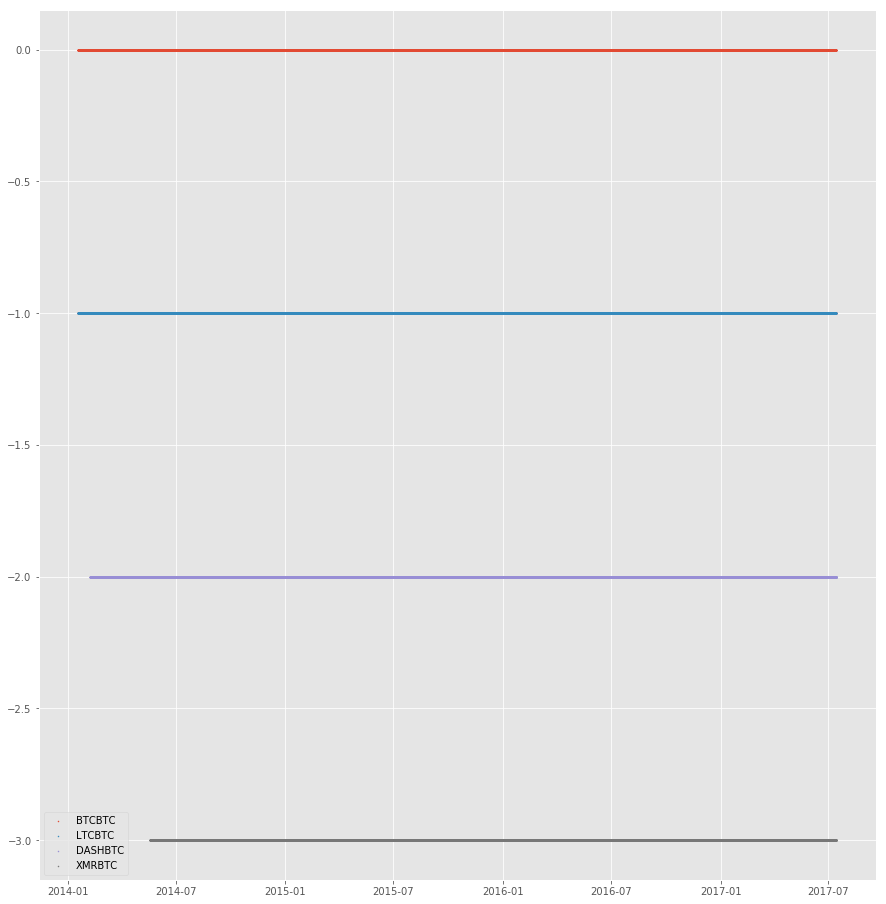

In [15]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs1):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

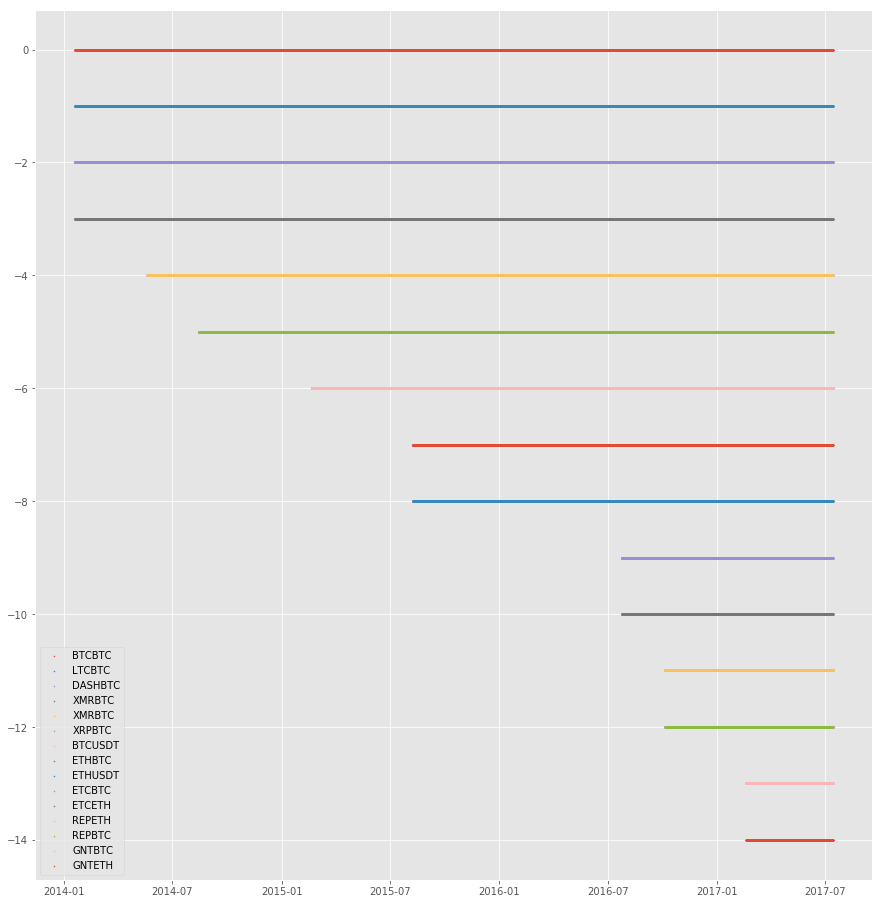

In [16]:
# view timeseries
plt.figure(figsize=(15,16))
for i, d in enumerate(dfs):
    name = d.name
    x=d.dropna().index
    y=[-i]*len(x)
    plt.scatter(x,y,label=name[:20], s=1)
plt.legend()

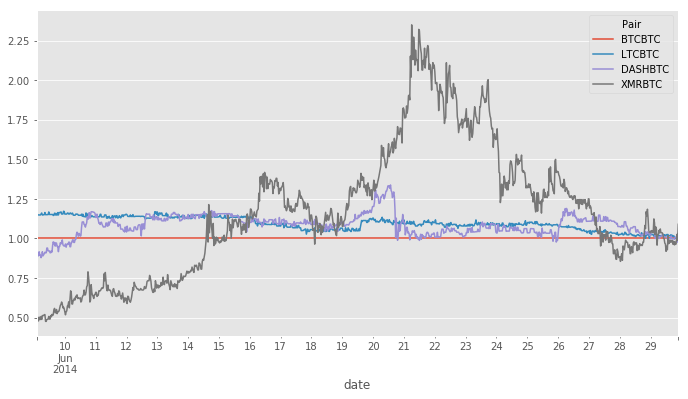

In [17]:
# View one day
data_window = df[1000:2000].copy()
open = data_window.xs('open', axis=1, level='Price')
data_window = data_window.divide(open.iloc[-1], level='Pair')
data_window = data_window.drop('open', axis=1, level='Price')
data_window.xs('close', axis=1, level='Price').plot()